In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [176]:
covid=pd.read_csv(r'C:\Users\pc\Desktop\60DaysDS\EDA projects\covid_19_clean_complete.csv')
daywise=pd.read_csv(r'C:\Users\pc\Desktop\60DaysDS\EDA projects\day_wise.csv')
worldometer=pd.read_csv(r'C:\Users\pc\Desktop\60DaysDS\EDA projects\worldometer_data.csv')

In [177]:
covid
#daywise.head(10)
#worldometer.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [178]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [179]:
#date is in object type lets convert it into datetime Formmat first
covid['Date'] = pd.to_datetime(covid['Date'])

In [180]:
covid.describe(include='all')


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,14664,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,78,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Australian Capital Territory,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,188,6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15040
mean,NaN,NaN,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,NaN
min,NaN,NaN,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,NaN,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,NaN,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN
max,NaN,NaN,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,NaN


**Missing Values**

In [181]:
covid.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [182]:
covid['Province/State'].fillna('Unknown', inplace=True)
covid.head()


C:\Users\pc\AppData\Local\Temp\ipykernel_12600\1679546757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid['Province/State'].fillna('Unknown', inplace=True)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Unknown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Unknown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Unknown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Unknown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Unknown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**Time Series Analysis**

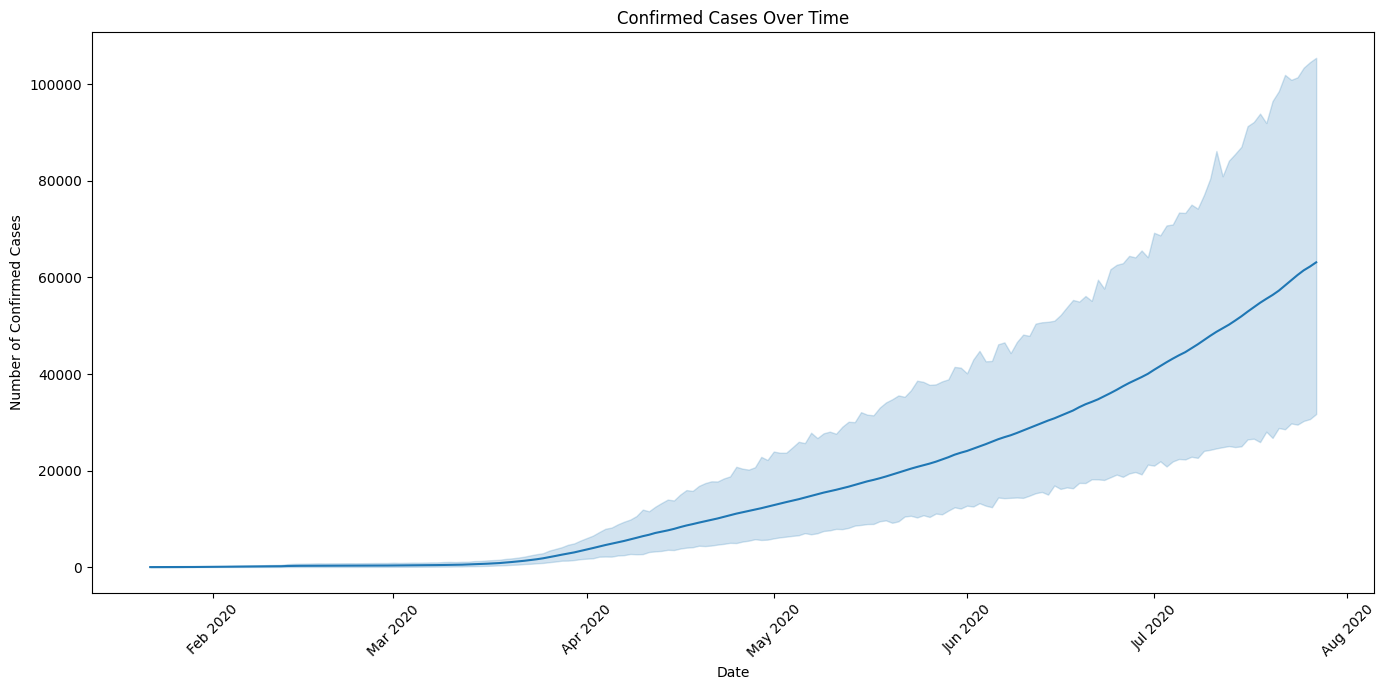

In [183]:
import matplotlib.dates as mdates

# Convert 'Date' column to datetime format
covid['Date'] = pd.to_datetime(covid['Date'])

# Plot with formatted x-axis
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Confirmed', data=covid)
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')

# Format the x-axis to show only month and year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**GEO Graphical analysis**

**Distribution of COnfirmed Cases**

In [184]:
top_countr = covid.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
top_countr


Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64

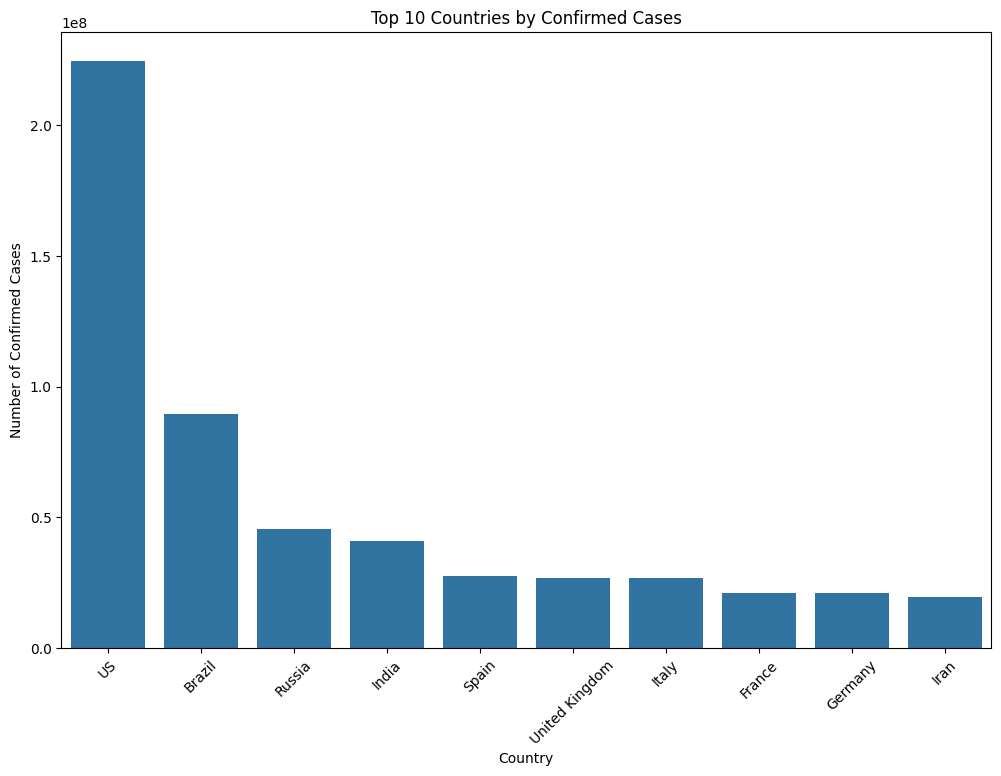

In [185]:
top_countr = covid.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countr.index, y=top_countr.values)
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

**Distribution of Deaths**

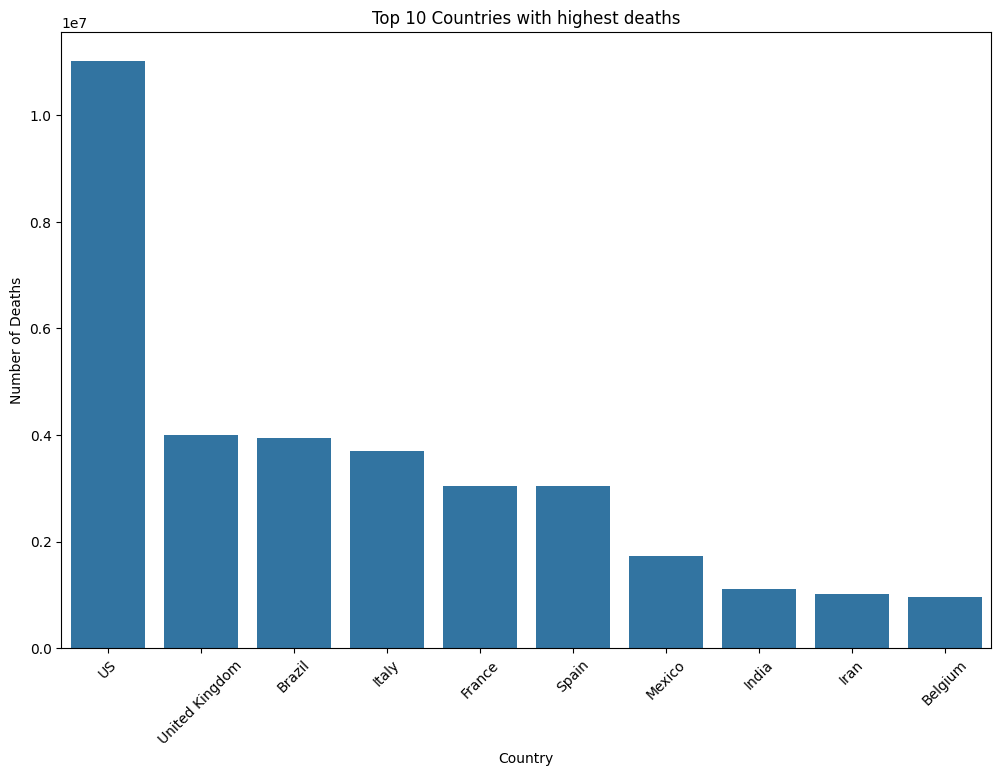

In [186]:
top_countr = covid.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countr.index, y=top_countr.values)
plt.title('Top 10 Countries with highest deaths')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

**Distribution of recoveries**

In [187]:
recoveries=covid.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(10)
recoveries

Country/Region
US         56353416
Brazil     54492873
Russia     25120448
India      23783720
Germany    17107839
Italy      15673910
Iran       15200895
Spain      15093583
Turkey     13345389
Chile      13292593
Name: Recovered, dtype: int64

**Co-relation**

In [188]:
corelation = covid[['Confirmed', 'Deaths']].corr()
corelation
# 0.912361 indicates a strong positive correlation b/w confirmed cases and deaths.means confirmed cases increases, the number of deaths also tends to increase.

,Confirmed,Deaths
Confirmed,1.000000,0.912361
Deaths,0.912361,1.000000


**Regression Analysis between confirmed  cases and deaths**

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [190]:
x=covid[['Confirmed']]
y_deaths=covid['Deaths']
model_deaths= LinearRegression().fit(x,y_deaths)
pred_deaths = model_deaths.predict(x)
r2_deaths=r2_score(y_deaths,pred_deaths)
print(f"Coefficient for Deaths: {model_deaths.coef_[0]}, Intercept: {model_deaths.intercept_}, R-squared: {r2_deaths}")

#the output means that:: for every 1 additional confirmed case deaths are expected to increase by 0.0452, this means
# deaths increases but a smaller rate. 
#The intercept indicated that when there is 0 confirmed cases the expected deaths are 120,these deaths are caused or influenced by other factors.
#R-squared: This value indicates that approximately 83.24% of the variance in the number of deaths can be explained by the number of confirmed cases.
#means the model fits the data quite well.

Coefficient for Deaths: 0.045249480508956365, Intercept: 120.14601353705007, R-squared: 0.8324025858869406


#Graphical representatin of this |^

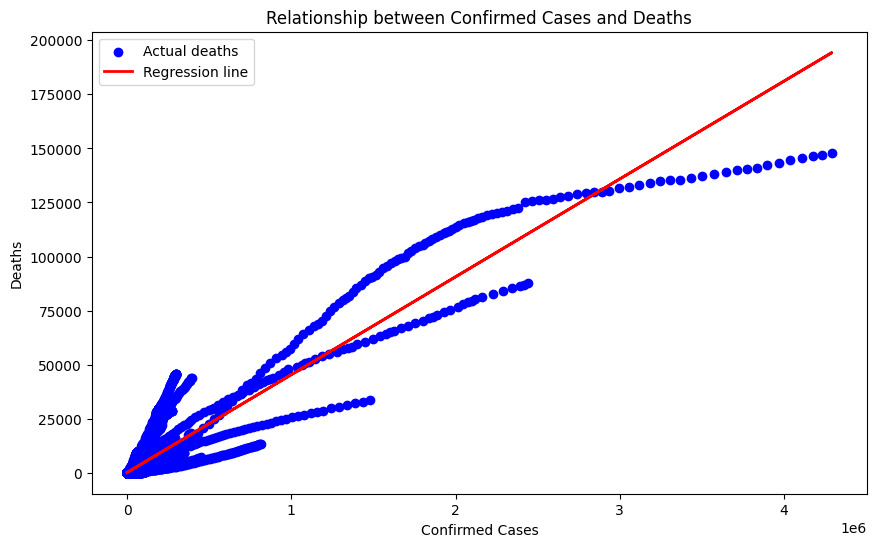

In [191]:
X = covid[['Confirmed']]
y_deaths = covid['Deaths']

model_deaths = LinearRegression().fit(X, y_deaths)
pred_deaths = model_deaths.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y_deaths, color='blue', label='Actual deaths')
plt.plot(X, pred_deaths, color='red', linewidth=2, label='Regression line')
plt.title('Relationship between Confirmed Cases and Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.legend()
plt.show()

**# Simple Linear Regression: Confirmed Cases vs. Recovered**

In [192]:
X = covid[['Confirmed']]
y_recovered = covid['Recovered'] #dependent

model_recovered = LinearRegression().fit(X, y_recovered)
pred_recovered = model_recovered.predict(X)

coefficient_recovered = model_recovered.coef_[0]

r2_recovered = model_recovered.score(X, y_recovered)

print(f"Coefficient for Recovered: {coefficient_recovered}")
print(f"R-squared: {r2_recovered}")

# For every one-unit increase in confirmed cases, there's a tendency for recovered cases to increase by about 0.38 units 
#The R-squared value of 0.8 indicates a reasonably strong linear relationship between the two variables.

Coefficient for Recovered: 0.38550252338921276
R-squared: 0.8019309578540259


In [193]:
covid.head(
    
)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Unknown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Unknown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Unknown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Unknown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Unknown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**Identifyig most impacted States**

In [194]:
state_summary = covid.groupby('Province/State').agg({
    'Confirmed': 'sum',  
    'Deaths': 'sum',     
    'Recovered': 'sum'   
}).reset_index()


print("Aggregated data by state:")
print(state_summary)


Aggregated data by state:
                  Province/State  Confirmed  Deaths  Recovered
0                        Alberta     751219   14245          0
1                       Anguilla        361       0        290
2                          Anhui     172497    1007     155768
3                          Aruba      12090     289       9629
4   Australian Capital Territory      13174     339      11264
..                           ...        ...     ...        ...
74             Western Australia      70669    1005      59833
75                      Xinjiang      14160     474      11280
76                         Yukon       1276       0          0
77                        Yunnan      32118     319      28400
78                      Zhejiang     220824     159     198777

[79 rows x 4 columns]


**Top 10 states by confirmed cases**

In [195]:
most_affected_states= state_summary.sort_values(by='Confirmed', ascending=False).head(10)

print("Top 10 states by confirmed cases:")
print(most_affected_states[['Province/State','Confirmed']])


Top 10 states by confirmed cases:
      Province/State  Confirmed
72           Unknown  803320064
30             Hubei   11473248
54            Quebec    4934478
51           Ontario    3100515
0            Alberta     751219
45   New South Wales     384636
7   British Columbia     298207
73          Victoria     279524
22         Guangdong     268051
15     French Guiana     226554


**Top 10 states by Total deaths**

In [196]:

most_affected_states_deaths = state_summary.sort_values(by= 'Deaths', ascending=False).head(10)


print("Top 10 states by total deaths:")
print(most_affected_states_deaths[['Province/State', 'Deaths']])


Top 10 states by total deaths:
      Province/State    Deaths
72           Unknown  41984417
30             Hubei    651932
54            Quebec    434065
51           Ontario    226791
7   British Columbia     16752
0            Alberta     14245
50       Nova Scotia      5394
45   New South Wales      5055
10   Channel Islands      4579
28             Henan      3628


**Death and Recovery rates of Countries**

In [197]:
country_summary = covid.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()


country_summary['Death Rate'] = country_summary['Deaths'] / country_summary['Confirmed']
country_summary['Recovery Rate'] = country_summary['Recovered'] / country_summary['Confirmed']


print("Country with death and recovery rates:")
print(country_summary[['Country/Region','Death Rate','Recovery Rate']])


Country with death and recovery rates:
         Country/Region  Death Rate  Recovery Rate
0           Afghanistan    0.025355       0.412231
1               Albania    0.029019       0.604351
2               Algeria    0.066092       0.640724
3               Andorra    0.057445       0.731685
4                Angola    0.047569       0.290045
..                  ...         ...            ...
182  West Bank and Gaza    0.005868       0.261817
183      Western Sahara    0.069922       0.719201
184               Yemen    0.263575       0.353960
185              Zambia    0.020422       0.646039
186            Zimbabwe    0.017345       0.240324

[187 rows x 3 columns]


**If we are interest in some specific Country then**

In [198]:
country_intrested = 'Afghanistan'  # we can change this and check it for any country we want
country_data=country_summary[country_summary['Country/Region']==country_intrested]
print(f"Death and Recovery rates for {country_intrested}:")
print(country_data)

Death and Recovery rates for Afghanistan:
  Country/Region  Confirmed  Deaths  Recovered  Death Rate  Recovery Rate
0    Afghanistan    1936390   49098     798240    0.025355       0.412231


**Visualizing the top 10 countries by death rate**

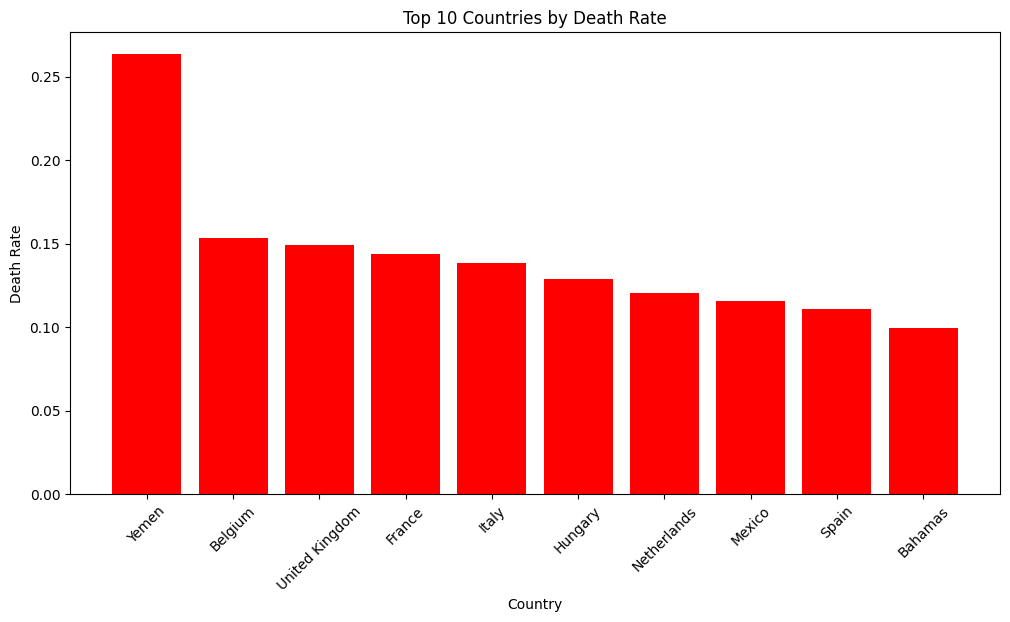

In [199]:
top_10_death_rate_countries = country_summary.sort_values(by='Death Rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_death_rate_countries['Country/Region'], top_10_death_rate_countries['Death Rate'], color='red')
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.title('Top 10 Countries by Death Rate')
plt.xticks(rotation=45)
plt.show()


**visualizing TOP 10 countries by recovery rate**

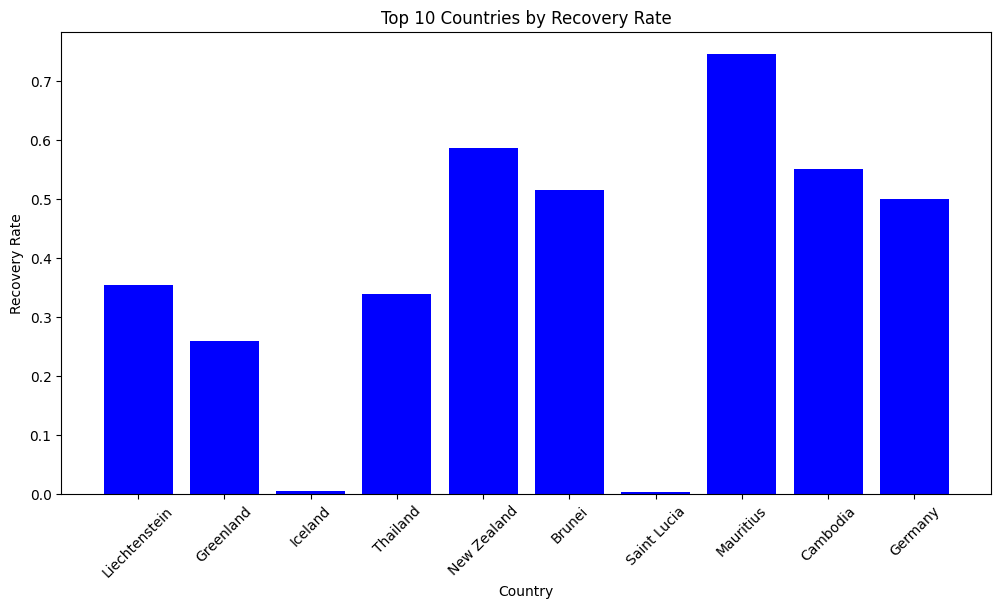

In [200]:
top_10_recover_rate_countries = country_summary.sort_values(by='Recovery Rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_recover_rate_countries['Country/Region'], top_10_death_rate_countries['Recovery Rate'], color='blue')
plt.xlabel('Country')
plt.ylabel('Recovery Rate')
plt.title('Top 10 Countries by Recovery Rate')
plt.xticks(rotation=45)
plt.show()


**Calculate Death Rate and Recovery Rate of States**

In [201]:
state_summary['Death Rate'] = state_summary['Deaths'] / state_summary['Confirmed']
state_summary['Recovery Rate'] = state_summary['Recovered'] / state_summary['Confirmed']

rates_summary = state_summary[['Province/State', 'Death Rate', 'Recovery Rate']]

print("State summary with death and recovery rates:")
print(rates_summary)


State summary with death and recovery rates:
                  Province/State  Death Rate  Recovery Rate
0                        Alberta    0.018963       0.000000
1                       Anguilla    0.000000       0.803324
2                          Anhui    0.005838       0.903019
3                          Aruba    0.023904       0.796443
4   Australian Capital Territory    0.025733       0.855017
..                           ...         ...            ...
74             Western Australia    0.014221       0.846665
75                      Xinjiang    0.033475       0.796610
76                         Yukon    0.000000       0.000000
77                        Yunnan    0.009932       0.884239
78                      Zhejiang    0.000720       0.900160

[79 rows x 3 columns]


**Visualizing top 10 states with highest death_rate**

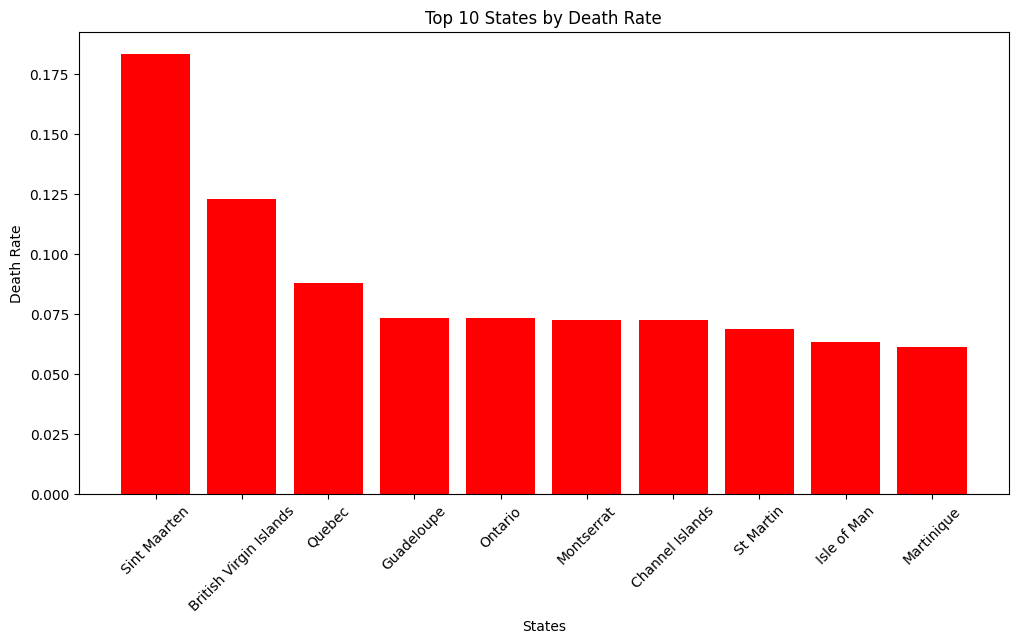

In [202]:
top_10_death_rate_states = state_summary.sort_values(by='Death Rate', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_death_rate_states['Province/State'], top_10_death_rate_states['Death Rate'], color='red')
plt.xlabel('States')
plt.ylabel('Death Rate')
plt.title('Top 10 States by Death Rate')
plt.xticks(rotation=45)
plt.show()

**if we are intrested in a specific state then:**

In [203]:
#do simple filtering
state_interested = 'New South Wales'  

specific_state_data = rates_summary[rates_summary['Province/State'] == state_interested]

print(f"Death and recovery rates for {state_interested}:")
print(specific_state_data)


Death and recovery rates for New South Wales:
     Province/State  Death Rate  Recovery Rate
45  New South Wales    0.013142       0.700475


**Top Countries with Highest active cases**

Country/Region
US                156981121
Brazil             31094060
United Kingdom     22624595
Russia             19668578
India              15987913
France             10980287
Spain               9277432
Canada              8656985
Peru                7748957
Italy               7363518
Name: Active, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_12600\830550687.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_active_countries.values, y=top_10_active_countries.index, palette='viridis')


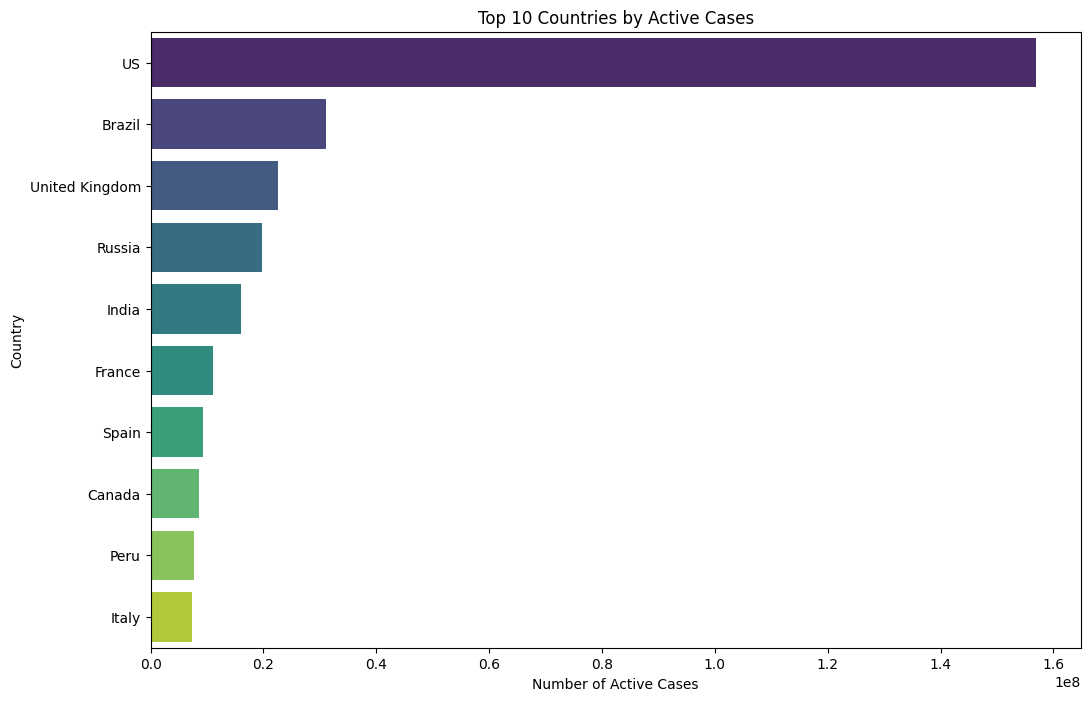

In [204]:
country_active_cases = covid.groupby('Country/Region')['Active'].sum().sort_values(ascending=False)
print(country_active_cases.head(10))

# Visualize 
top_10_active_countries = country_active_cases.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_active_countries.values, y=top_10_active_countries.index, palette='viridis')
plt.title('Top 10 Countries by Active Cases')
plt.xlabel('Number of Active Cases')
plt.ylabel('Country')
plt.show()


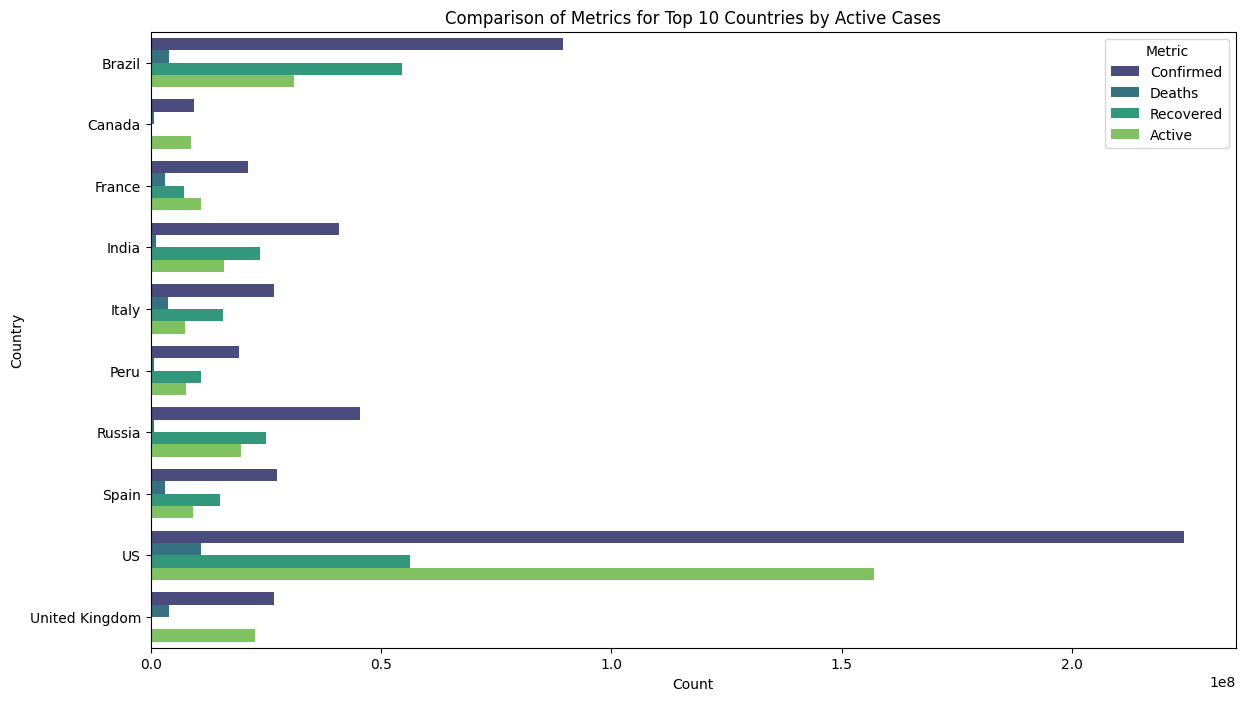

In [205]:
summary_by_country = covid.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Melting for better visualization
melted_summary = summary_by_country.melt(id_vars='Country/Region', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], var_name='Metric', value_name='Count')

# top 10  by confirmed cases
top_countries_list = country_active_cases.head(10).index.tolist()
top_countries_data = melted_summary[melted_summary['Country/Region'].isin(top_countries_list)]

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Country/Region', hue='Metric', data=top_countries_data, palette='viridis')
plt.title('Comparison of Metrics for Top 10 Countries by Active Cases')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Metric')
plt.show()


**Lets do corelation Analysis**

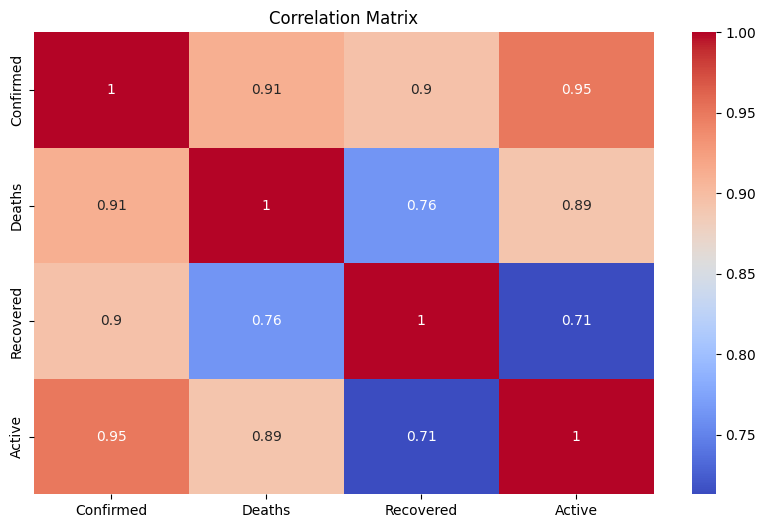

In [206]:
plt.figure(figsize=(10, 6))
sns.heatmap(covid[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Summary**

**The USA had the highest confirmed cases with 224,345,948, followed by Brazil with 89,524,967, and Russia with 45,408,411.
The highest deaths were in the USA with 41,984,417, followed by Hubei with 651,932, and Quebec with 434,065.
 A strong positive correlation (0.91) was found between confirmed cases and deaths.
Linear Regression: The analysis showed that recoveries significantly impacted confirmed cases, with a coefficient of 0.39 and an R-squared value of 0.80, explaining 80% of the variance in confirmed cases.
The highest death rates were observed in Yemen (26.36%), while Angola had lower recovery rates (29%). 
The data highlights the severe impact of COVID-19, with the USA being the most affected in terms of confirmed cases, 
deaths, and active cases.**